In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv(r'AAPL_data.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1259, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [184]:
df['date'] = pd.to_datetime(df['date'])

# Format the 'date' column to the desired format
df['date'] = df['date'].apply(lambda x: x.strftime("%m/%d/%Y"))


In [185]:
# # Set the date column as the index
# df.set_index('date', inplace=True)
# df

In [186]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


# Preprocessing

<Axes: >

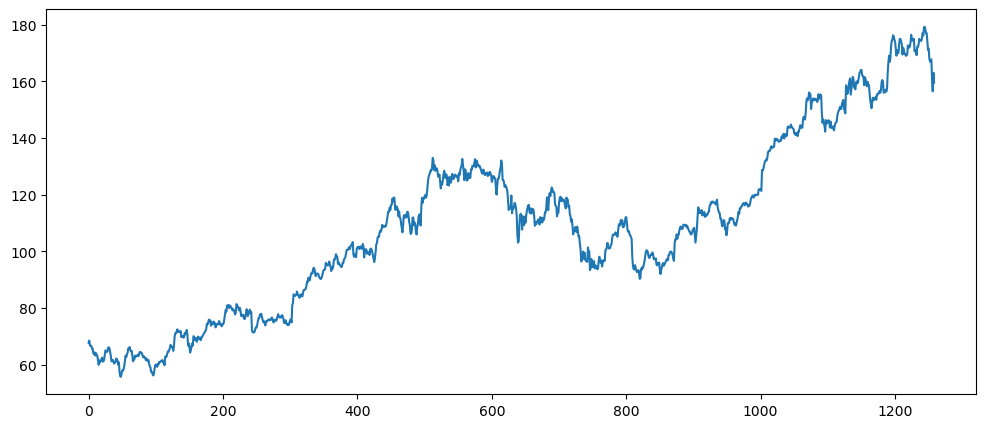

In [187]:
df['close'].plot(figsize=(12,5))

In [188]:
#dropping unneccessary columns
df=df.drop('Name',axis=1)
df

,date,open,high,low,close,volume
0,02/08/2013,67.7142,68.4014,66.8928,67.8542,158168416
1,02/11/2013,68.0714,69.2771,67.6071,68.5614,129029425
2,02/12/2013,68.5014,68.9114,66.8205,66.8428,151829363
3,02/13/2013,66.7442,67.6628,66.1742,66.7156,118721995
4,02/14/2013,66.3599,67.3771,66.2885,66.6556,88809154
...,...,...,...,...,...,...
1254,02/01/2018,167.1650,168.6200,166.7600,167.7800,47230787
1255,02/02/2018,166.0000,166.8000,160.1000,160.5000,86593825
1256,02/05/2018,159.1000,163.8800,156.0000,156.4900,72738522
1257,02/06/2018,154.8300,163.7200,154.0000,163.0300,68243838


In [189]:
#checking datatypes
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [190]:
df=df.dropna()

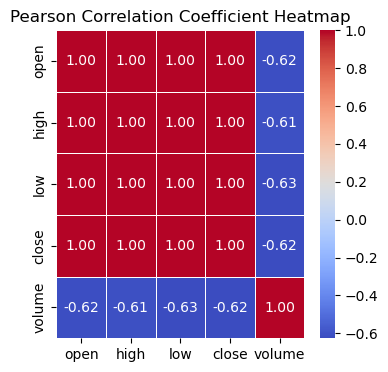

In [191]:
# Calculate Pearson correlation coefficient
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

In [192]:
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
df.set_index('date', inplace=True)

# Group by month
monthly_data = df.resample('M').mean()

monthly_data

C:\Users\Shabaan\AppData\Local\Temp\ipykernel_19260\2934913362.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


,open,high,low,close,volume
date,,,,,
2013-02-28,65.660957,66.221671,64.803536,65.306264,1.151152e+08
2013-03-31,63.144435,63.829005,62.476795,63.120110,1.144458e+08
2013-04-30,59.966595,60.793227,59.246027,59.966432,1.242467e+08
2013-05-31,63.771505,64.522527,63.070718,63.778927,1.072722e+08
2013-06-30,61.137360,61.610010,60.293235,60.791120,8.769157e+07
...,...,...,...,...,...
2017-10-31,157.355682,158.586791,156.670223,157.817273,2.292232e+07
2017-11-30,172.539762,173.427843,170.990757,172.406190,2.858888e+07
2017-12-31,171.722000,172.885935,170.848500,171.891500,2.655920e+07


In [193]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max Scaling to the data

scaler = MinMaxScaler()
scaled_monthly_data = scaler.fit_transform(monthly_data)

# Convert the scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_monthly_data, columns=monthly_data.columns, index=monthly_data.index)

# Display the scaled monthly data
temp=scaled_df
temp

,open,high,low,close,volume
date,,,,,
2013-02-28,0.049927,0.047447,0.048934,0.046825,0.912701
2013-03-31,0.027863,0.026534,0.028447,0.027654,0.906302
2013-04-30,0.000000,0.000000,0.000000,0.000000,1.000000
2013-05-31,0.033360,0.032596,0.033676,0.033432,0.837720
2013-06-30,0.010265,0.007139,0.009221,0.007232,0.650524
...,...,...,...,...,...
2017-10-31,0.853883,0.854763,0.857818,0.858049,0.031314
2017-11-30,0.987013,0.984481,0.983910,0.985978,0.085488
2017-12-31,0.979843,0.979745,0.982657,0.981465,0.066084


In [194]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a datetime index and 'close' column
# If not, replace 'close' with your column name
close_series = df['close']

# Test for stationarity
result = adfuller(close_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The series is not stationary. Performing differencing...")
    # Difference the series
    diff_close_series = close_series.diff().dropna()
    # Test for stationarity again
    result_diff = adfuller(diff_close_series)
    print("ADF Statistic after differencing:", result_diff[0])
    print("p-value after differencing:", result_diff[1])
else:
    print("The series is stationary.")

ADF Statistic: -0.6650906914089926
p-value: 0.8555858445838951
The series is not stationary. Performing differencing...
ADF Statistic after differencing: -34.820091250887394
p-value after differencing: 0.0


In [195]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_df, test_size=0.2, shuffle=False)

# Display the shape of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (48, 5)
Testing data shape: (13, 5)


# ARIMA

In [196]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Assuming 'close' is the column you want to use for modeling
train_data_univariate = train_data['close']
test_data_univariate = test_data['close']

# Define the ARIMA model parameters
p = 1  # Autoregression order
d = 3  # Degree of differencing
q = 1  # Moving average order

# Calculate rolling mean
window_size = 2  # Adjust window size as needed
# Calculate exponentially weighted mean
ewma = train_data_univariate.ewm(span=window_size, adjust=False).mean()


# Create and fit the ARIMA model with rolling mean
model = ARIMA(ewma, order=(p, d, q))
model_fit = model.fit()

# Check if test_data_univariate is not empty
if len(test_data_univariate) > 0:
    # Make predictions on the test dataset
    forecast = model_fit.forecast(steps=len(test_data_univariate))

    # Check if forecast is not empty
    if forecast is not None and len(forecast) > 0:
        # Access the forecasted values
        forecast_values = forecast

        # Calculate the RMSE
        rmse = np.sqrt(np.mean((forecast_values - test_data_univariate)**2))
        print("Root Mean Squared Error (RMSE) with rolling mean:", rmse)
    else:
        print("Forecast is empty.")
else:
    print("Test data is empty, cannot make predictions.")


Root Mean Squared Error (RMSE) with rolling mean: 0.09583111432645157


C:\Users\Shabaan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


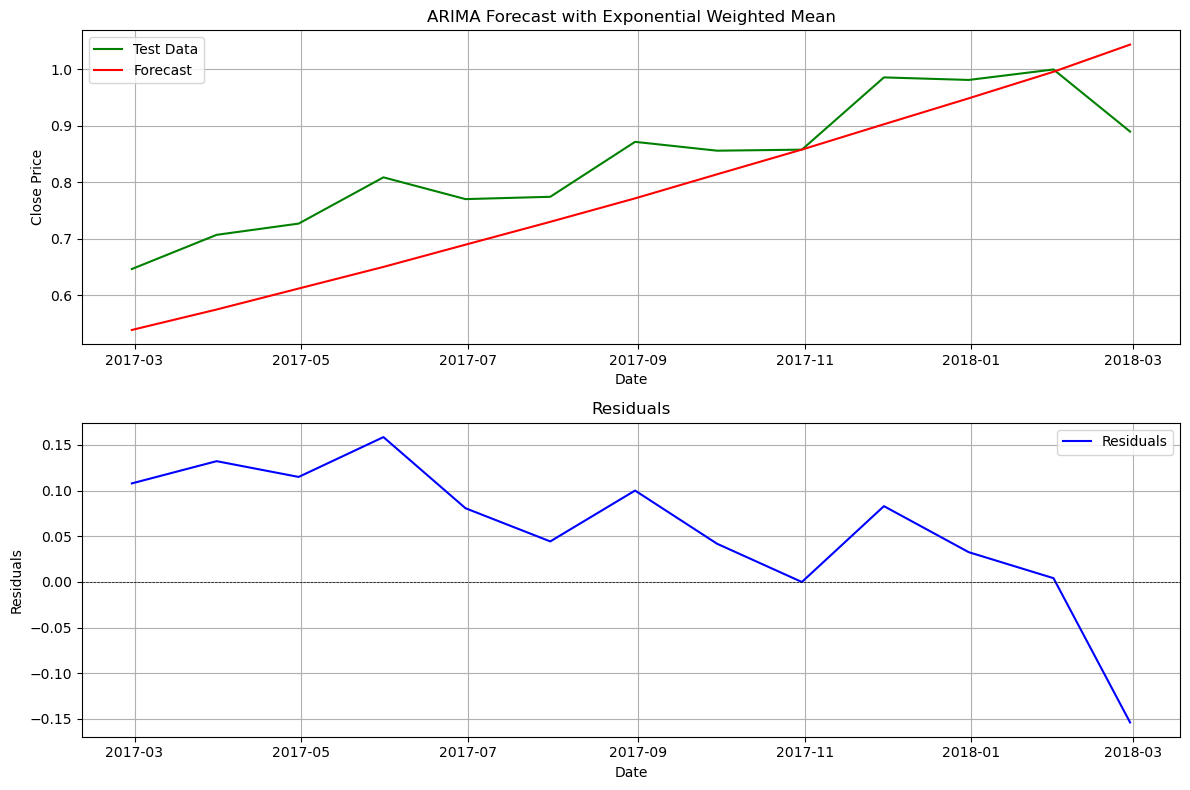

In [197]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = test_data_univariate - forecast_values

# Plot the original data, forecast, and residuals
plt.figure(figsize=(12, 8))

# Plot Test Data and Forecast
plt.subplot(2, 1, 1)
plt.plot(test_data_univariate.index, test_data_univariate, label='Test Data', color='green')
plt.plot(test_data_univariate.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast with Exponential Weighted Mean')
plt.legend()
plt.grid(True)

# Plot Residuals
plt.subplot(2, 1, 2)
plt.plot(test_data_univariate.index, residuals, label='Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# HYBRID MODEL

In [198]:
from sklearn.neural_network import MLPRegressor
min_length = min(len(forecast_values), len(residuals))
forecast_values_2d = forecast_values[:min_length].to_numpy().reshape(-1, 1)
residuals_2d = residuals[:min_length].to_numpy().reshape(-1, 1)

# Combine ARIMA forecasts and residuals for input to ANN
X_ann = np.column_stack((forecast_values_2d, residuals_2d))
y_ann = residuals_2d

# Train ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500)
ann_model.fit(X_ann, y_ann)

# Combine forecasts from ARIMA and predictions from ANN
ann_forecast = ann_model.predict(X_ann)
hybrid_forecast = forecast_values[:min_length] + ann_forecast.flatten()  # Flatten to match dimensions for addition

# Convert hybrid_forecast to a NumPy array
hybrid_forecast_np = hybrid_forecast.values

# Calculate RMSE for the hybrid model
rmse = np.sqrt(np.mean((y_test.flatten() - hybrid_forecast_np.flatten())**2))
print(f'Hybrid Model RMSE: {rmse}')

# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='green')
plt.plot(np.arange(len(y_test)), hybrid_forecast, label='Hybrid Forecast', color='blue')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Hybrid ARIMA-ANN Model Forecast')
plt.legend()
plt.show()



residuals = y_test - hybrid_forecast_np

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(residuals)), residuals, label='Residuals', color='red')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residuals of Hybrid ARIMA-ANN Model')
plt.legend()
plt.show()



C:\Users\Shabaan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: operands could not be broadcast together with shapes (16,) (13,) 

# ANN

In [199]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data
# If 'date' is not the index, you can set it as the index using df.set_index('date', inplace=True)

# Extract features (X) and target variable (y)
X = scaled_df.drop(columns=['close']).values
y = scaled_df['close'].values.reshape(-1, 1)  # Reshape to ensure the shape is compatible with TensorFlow

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)

# Inverse transform the predictions to get them back to the original scale
y_pred_original_scale = scaler.inverse_transform(y_pred)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
print("Root Mean Squared Error (RMSE) for ANN:", rmse)


C:\Users\Shabaan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Root Mean Squared Error (RMSE) for ANN: 0.08755614491674676


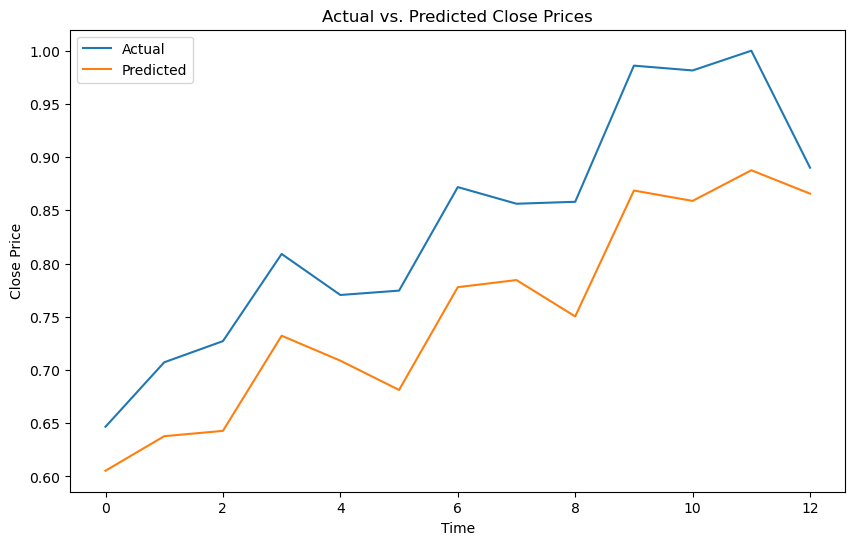

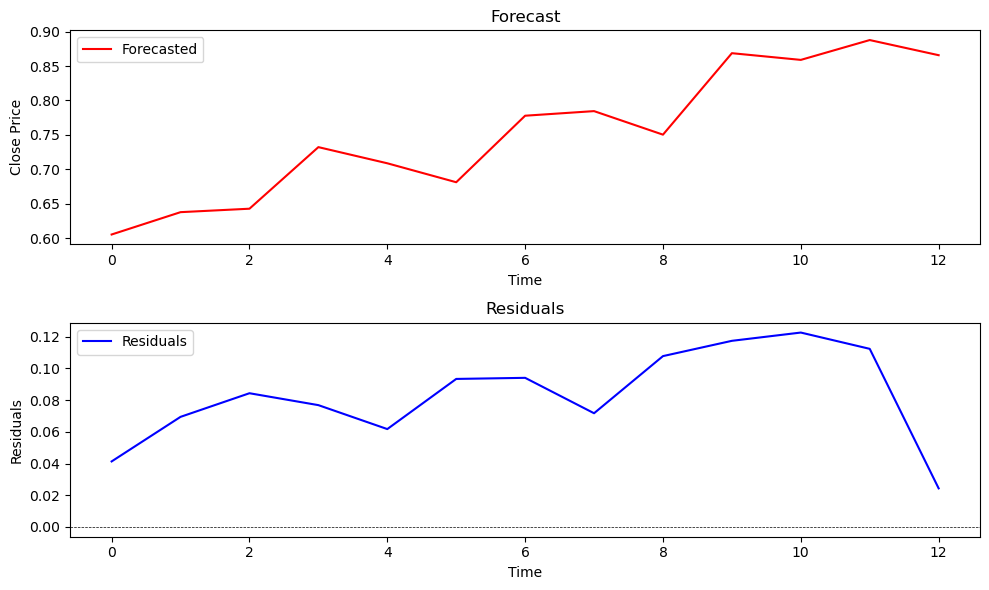

In [200]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test_original_scale - y_pred_original_scale

# Plot actual vs. predicted 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(y_pred_original_scale, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()

# Plot forecast and residuals
plt.figure(figsize=(10, 6))

# Plot Forecast
plt.subplot(2, 1, 1)
plt.plot(y_pred_original_scale, label='Forecasted', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Forecast')
plt.legend()

# Plot Residuals
plt.subplot(2, 1, 2)
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# SARIMA

In [201]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
p = 4  # Autoregression order
d = 2  # Degree of differencing
q = 1  # Moving average order
P = 2  # Seasonal autoregressive order
D = 1  # Seasonal difference order
Q = 3  # Seasonal moving average order
s = 12  # Length of seasonal cycle (assuming monthly data)

# Create and fit the SARIMA model
model = SARIMAX(train_data_univariate, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Check if test_data_univariate is not empty
if len(test_data_univariate) > 0:
    # Make predictions on the test dataset
    forecast = model_fit.forecast(steps=len(test_data_univariate))

    # Check if forecast is not empty
    if forecast is not None and len(forecast) > 0:
        # Access the forecasted values
        forecast_values = forecast

        # Calculate the RMSE
        rmse = np.sqrt(np.mean((forecast_values - test_data_univariate)**2))
        print("Root Mean Squared Error (RMSE):", rmse)
    else:
        print("Forecast is empty.")
else:
    print("Test data is empty, cannot make predictions.")


C:\Users\Shabaan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Root Mean Squared Error (RMSE): 0.09620077797324357


C:\Users\Shabaan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


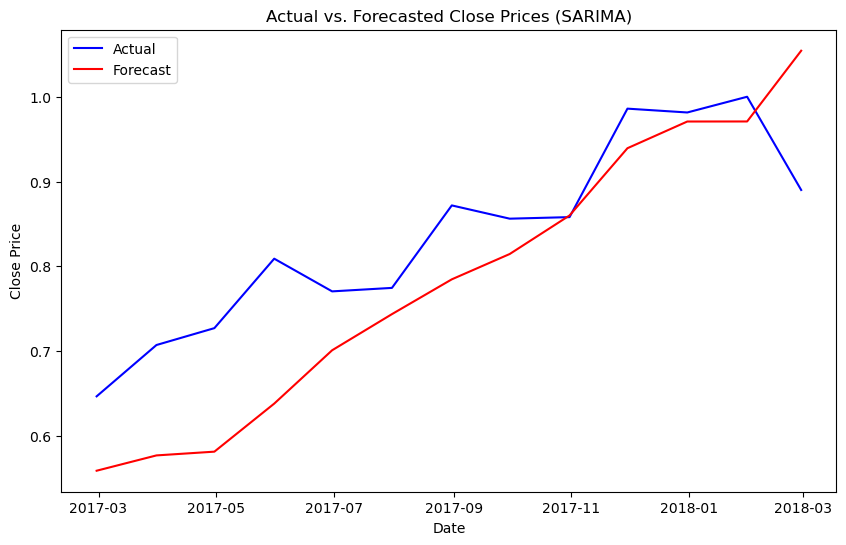

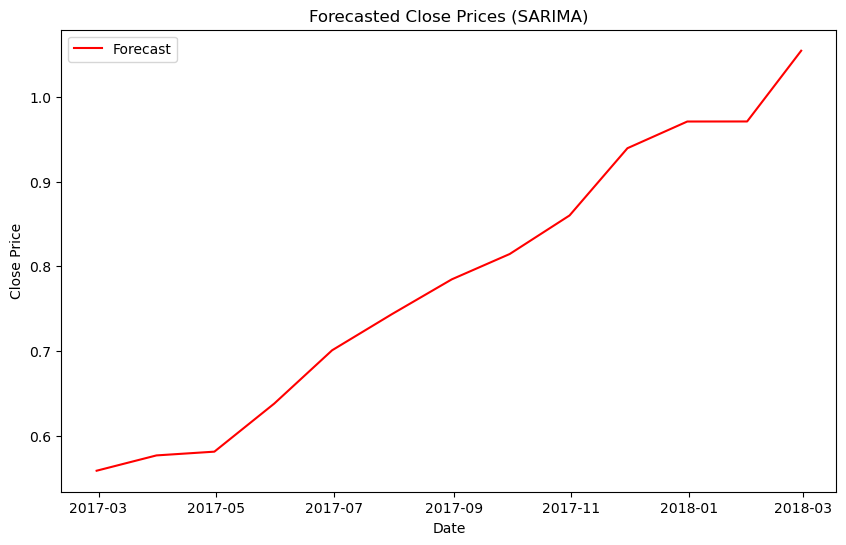

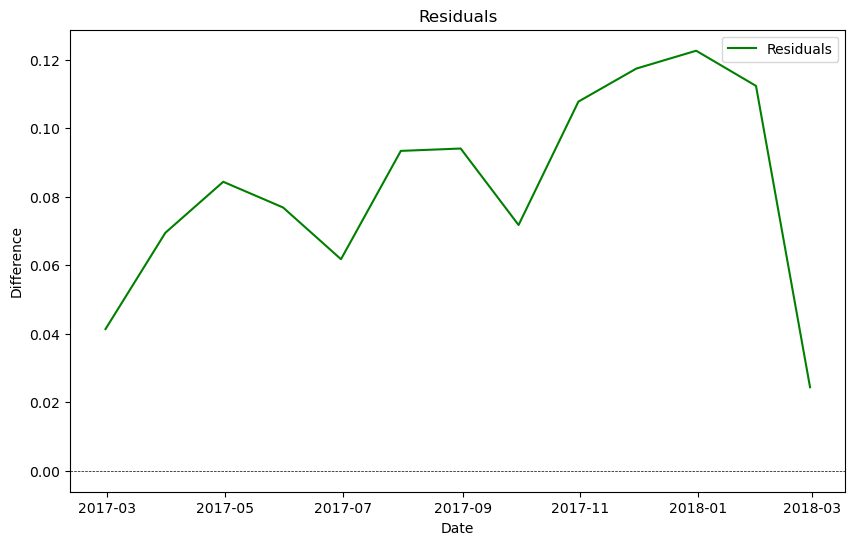

In [202]:
import matplotlib.pyplot as plt

# Plot the forecasted values and actual test data
plt.figure(figsize=(10, 6))
plt.plot(test_data_univariate.index, test_data_univariate, label='Actual', color='blue')
plt.plot(test_data_univariate.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Forecasted Close Prices (SARIMA)')
plt.legend()
plt.show()
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data_univariate.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Prices (SARIMA)')
plt.legend()
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(test_data_univariate.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Residuals')
plt.legend()
plt.show()



# ETS

In [203]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the ETS model parameters
trend = 'add'  # Type of trend component: 'add' (additive) or 'mul' (multiplicative)
seasonal = 'add'  # Type of seasonal component: 'add' (additive) or 'mul' (multiplicative)
seasonal_periods = 17# Number of seasons (assuming monthly data)

# Create and fit the ETS model
model = ExponentialSmoothing(train_data_univariate, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
model_fit = model.fit()

# Check if test_data_univariate is not empty
if len(test_data_univariate) > 0:
    # Make predictions on the test dataset
    forecast = model_fit.forecast(steps=len(test_data_univariate))

    # Check if forecast is not empty
    if forecast is not None and len(forecast) > 0:
        # Calculate the RMSE
        rmse = np.sqrt(np.mean((forecast - test_data_univariate)**2))
        print("Root Mean Squared Error (RMSE):", rmse)
    else:
        print("Forecast is empty.")
else:
    print("Test data is empty, cannot make predictions.")


Root Mean Squared Error (RMSE): 0.09598344010956004


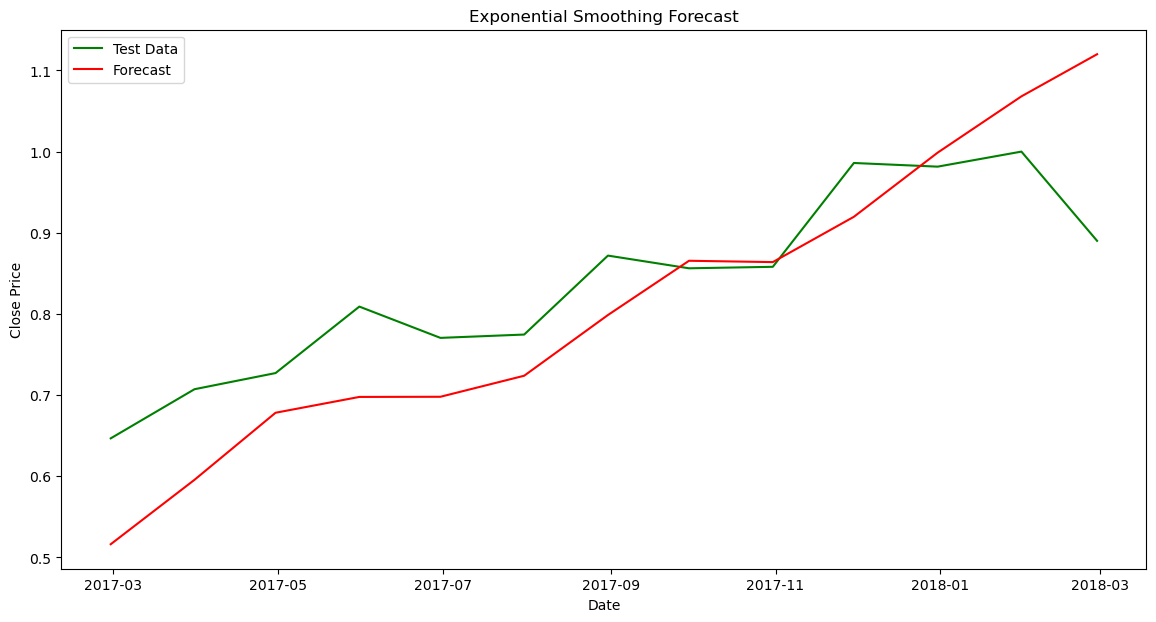

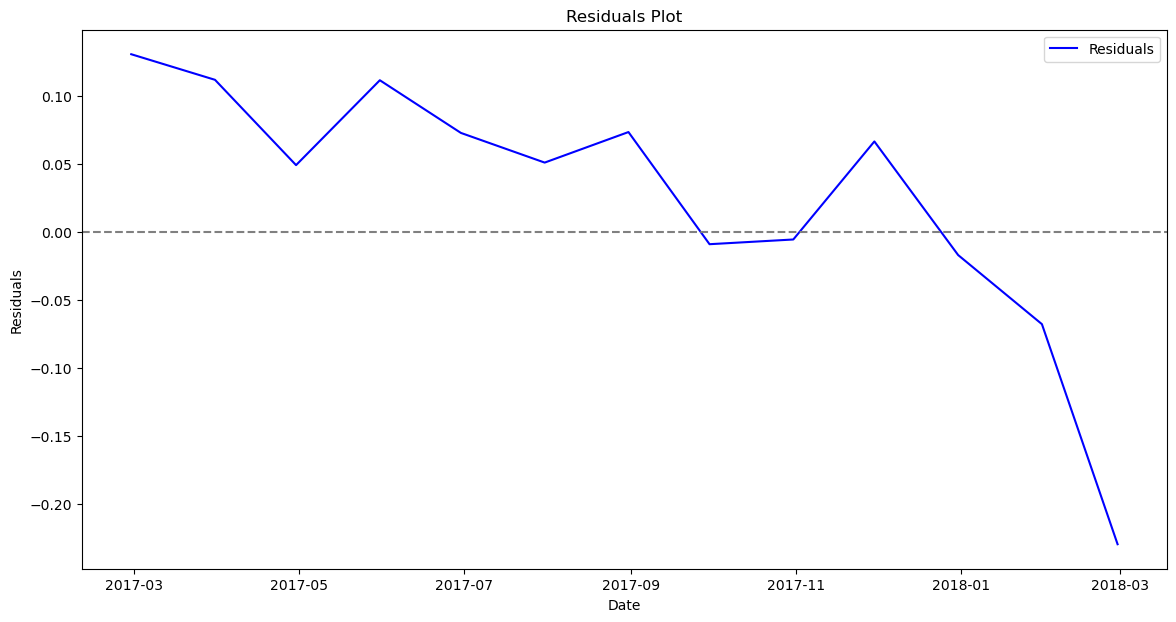

In [204]:
import matplotlib.pyplot as plt


# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(test_data_univariate.index, test_data_univariate, label='Test Data', color='green')
plt.plot(test_data_univariate.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Calculate and plot the residuals
residuals = test_data_univariate - forecast
plt.figure(figsize=(14, 7))
plt.plot(test_data_univariate.index, residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='gray')  # Add a horizontal line at y=0 for reference
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()



# Prophet

In [205]:
import pandas as pd
from prophet import Prophet

scaled_df['ds'] = scaled_df.index  # Assuming 'date' is the name of your index
scaled_df.rename(columns={'close': 'y'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(scaled_df)

# Make predictions for the future
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming test_data contains the actual values for the test period
actual_values = test_data['close'].values

# Extract predicted values from the forecast DataFrame
predicted_values = forecast.loc[forecast['ds'].isin(test_data.index), 'yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print("Root Mean Squared Error (RMSE):", rmse)

02:23:53 - cmdstanpy - INFO - Chain [1] start processing
02:23:53 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error (RMSE): 0.09326422035539245


C:\Users\Shabaan\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


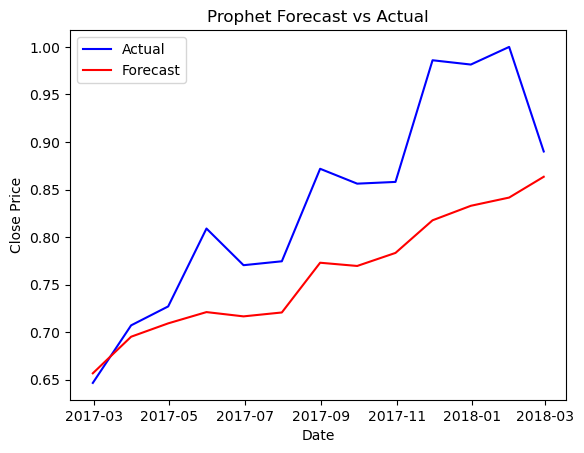

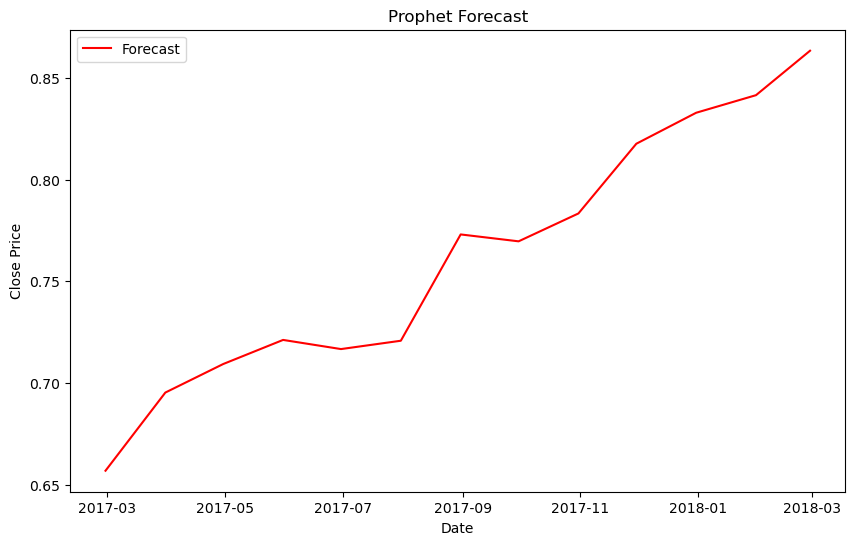

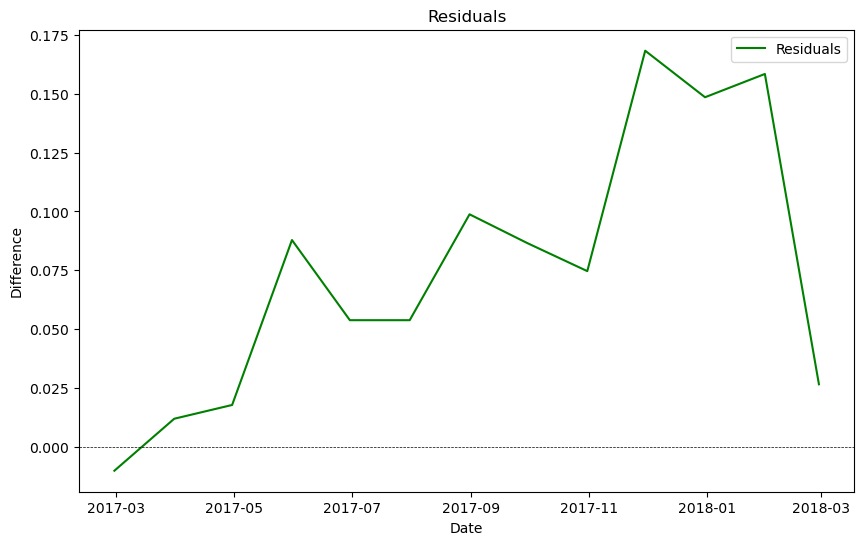

In [206]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(test_data.index, actual_values, label='Actual', color='blue')

# Plot predicted values
plt.plot(test_data.index, predicted_values, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prophet Forecast vs Actual')
plt.legend()

# Show plot
plt.show()


# Plot forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, predicted_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

# Calculate residuals
residuals = actual_values - predicted_values

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Residuals')
plt.legend()
plt.show()


# SVR

In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
# Assuming your dataset is loaded into a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame
# Also, ensure that your target variable (close price) is labeled 'close'

# Assuming 'close' is your target variable
X = monthly_data.drop(columns=['close'])  # Features
y = monthly_data['close']  # Target variable

# Apply log transformation to the features and target variable
X_log = np.log(X + 1)  # Adding 1 to handle zero values
y_log = np.log(y + 1)  # Adding 1 to handle zero values

# Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler for log transformation
scaler_log = MinMaxScaler()
X_train_scaled_log = scaler_log.fit_transform(X_train_log)
X_test_scaled_log = scaler_log.transform(X_test_log)

# Define the best parameters
best_params = {'C': 3.0, 'degree': 10, 'gamma': 'scale', 'kernel': 'linear'}

# Create the SVR model with the best parameters for log transformation
best_modelSVR_log = SVR(**best_params)

# Train the SVR model for log transformation
best_modelSVR_log.fit(X_train_scaled_log, y_train_log)

# Predict on the test set for log transformation
y_pred_log = best_modelSVR_log.predict(X_test_scaled_log)

# Calculate RMSE for log transformation
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
print("RMSE with log transformation:", rmse_log)


RMSE with log transformation: 0.05789740403951715


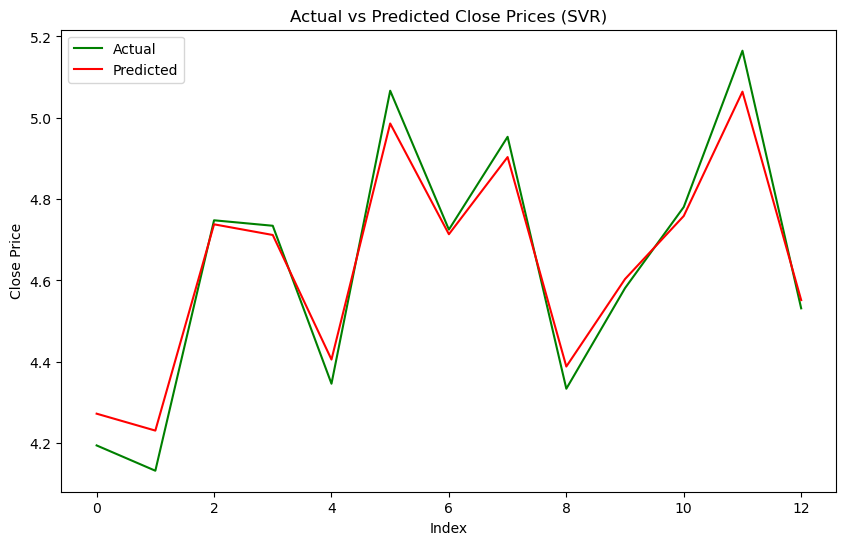

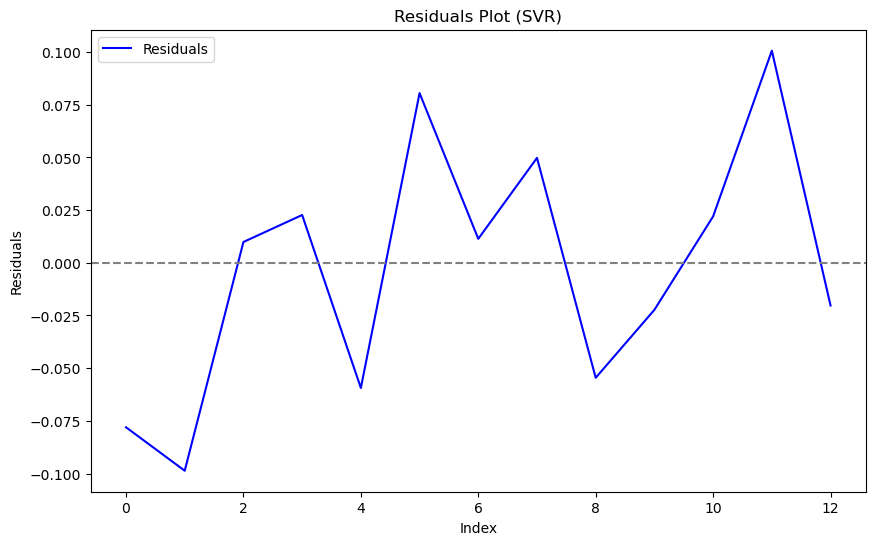

In [208]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test_log.values - y_pred_log

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_log.values, label='Actual', color='green')
plt.plot(y_pred_log, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (SVR)')
plt.legend()
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, linestyle='--', color='gray')  # Add a horizontal line at y=0 for reference
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot (SVR)')
plt.legend()
plt.show()


# LSTM

In [209]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert DataFrame to numpy array
data_array = monthly_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_array_scaled = scaler.fit_transform(data_array)

# Convert data to sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Define the length of input sequences
XLTSM, yLTSM = create_sequences(data_array_scaled, sequence_length)

# 2. Design the Model
modelLTSM = Sequential()
modelLTSM.add(LSTM(units=50, return_sequences=True, input_shape=(XLTSM.shape[1], 1)))
modelLTSM.add(LSTM(units=50))
modelLTSM.add(Dense(units=1))

# 3. Compile the Model
modelLTSM.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
modelLTSM.fit(XLTSM, yLTSM, epochs=100, batch_size=32)

# 5. Evaluate the Model (Optional)
# You can split your data into training and testing sets to evaluate the model's performance



Epoch 1/100


C:\Users\Shabaan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3555
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2282
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1945 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1323 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0613 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0335
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0392
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0448  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0189
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0195  
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0217
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0237  
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113
Epoch 84/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128
Epoch 85/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 
Epoch 86/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 
Epoch 87/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117
Epoch 88/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0101
Epoch 89/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106
Epoch 90/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 
Epoch 91/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114
Epoch 92/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 
Epoch 93/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 
Epoch 94/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 
Epoch 95/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102
Epoch 96/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 
Epoch 97/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0094
Epoch 98/100
2/2 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
RMSE: 0.09848950062354817


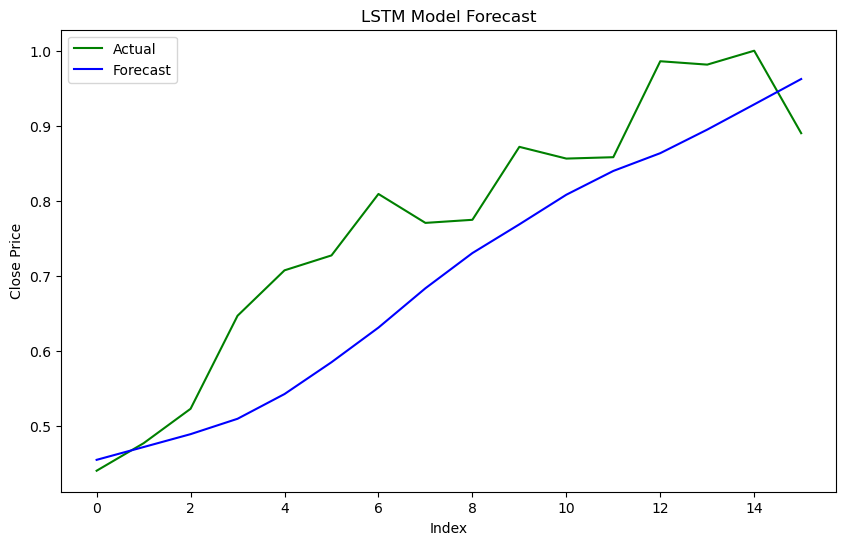

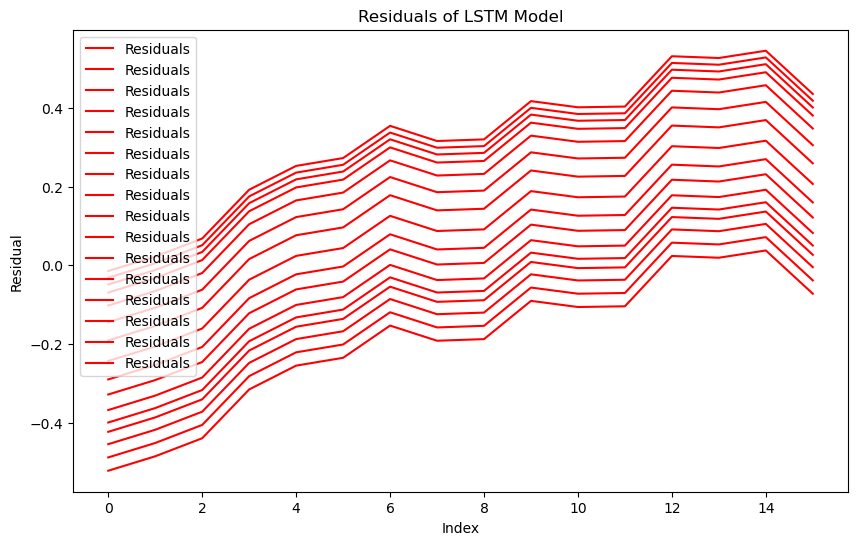

In [210]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XLTSM, yLTSM, test_size=0.3, shuffle=False)

# Make predictions using the LSTM model
y_pred = modelLTSM.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='green')
plt.plot(np.arange(len(y_test)), y_pred, label='Forecast', color='blue')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('LSTM Model Forecast')
plt.legend()
plt.show()

# Calculate and plot the residuals
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(residuals)), residuals, label='Residuals', color='red')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residuals of LSTM Model')
plt.legend()
plt.show()
